# Image variations using Dall-E
In this notebook we will use [Dall-E 2](https://openai.com/dall-e-2) to vary an image. Image variations can be useful for producing multiple example images and studying if algorithms, e.g. for segmentation, are capable to process these images. For convenience reasons, we will use the [Darth-D](https://github.com/haesleinhuepf/darth-d/) library to process the image.

In [1]:
from skimage.io import imread
import stackview

In [2]:
def vary(input_image, model="dall-e-2", image_width:int=1024, image_height:int=1024, num_images:int=1):
    """Varies an image using OpenAI's DALL-E.

    Parameters
    ----------
    input_image: 2D image, potentially RGB
    model: str, optional
        "dall-e-2", "dall-e-3"
    image_width: int, optional
        must be 256, 512 or 1024 for dall-e-2
    image_height: int, optional
        must be 256, 512 or 1024 for dall-e-2

    See Also
    --------
    https://platform.openai.com/docs/guides/images/variations

    Returns
    -------
    single 2D image or 3D image with the first dimension = num_images
    """
    from openai import OpenAI
    from image_utilities import numpy_to_bytestream
    from image_utilities import images_from_url_responses
    
    from stackview._image_widget import _img_to_rgb
    from warnings import warn

    warn("Using the vary function on scientific images could be seen as scientific misconduct. Handle this function with care.")
    client = OpenAI()

    size_str = f"{image_width}x{image_height}"

    response = client.images.create_variation(
      image=numpy_to_bytestream(_img_to_rgb(input_image)),
      n=num_images,
      size=size_str,
    )

    # bring result in right format
    return images_from_url_responses(response, input_image.shape)

As example image we use this image.

StackViewNDArray([[ 40,  32,  24, ..., 216, 200, 200],
                  [ 56,  40,  24, ..., 232, 216, 216],
                  [ 64,  48,  24, ..., 240, 232, 232],
                  ...,
                  [ 72,  80,  80, ...,  48,  48,  48],
                  [ 80,  80,  80, ...,  48,  48,  48],
                  [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)
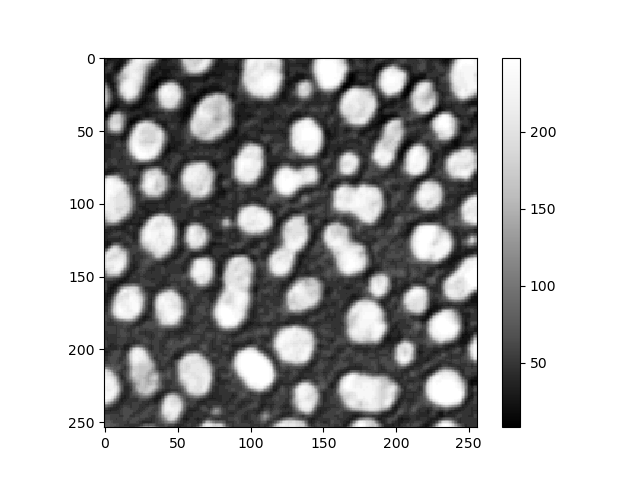
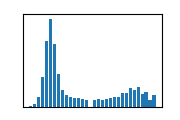

In [3]:
image = imread("../03b_image_processing/data/blobs.tif")
stackview.insight(image)

C:\Users\haase\AppData\Local\Temp\ipykernel_23388\1310196981.py:29: UserWarning: Using the vary function on scientific images could be seen as scientific misconduct. Handle this function with care.
  warn("Using the vary function on scientific images could be seen as scientific misconduct. Handle this function with care.")


StackViewNDArray([[ 4,  4,  4, ...,  6,  7,  6],
                  [ 4,  5,  5, ...,  7,  6,  6],
                  [ 4,  4,  4, ...,  6,  6,  6],
                  ...,
                  [ 3,  3,  3, ..., 47, 33, 20],
                  [ 2,  3,  3, ..., 40, 44, 31],
                  [ 2,  2,  3, ..., 38, 39, 35]], dtype=uint8)
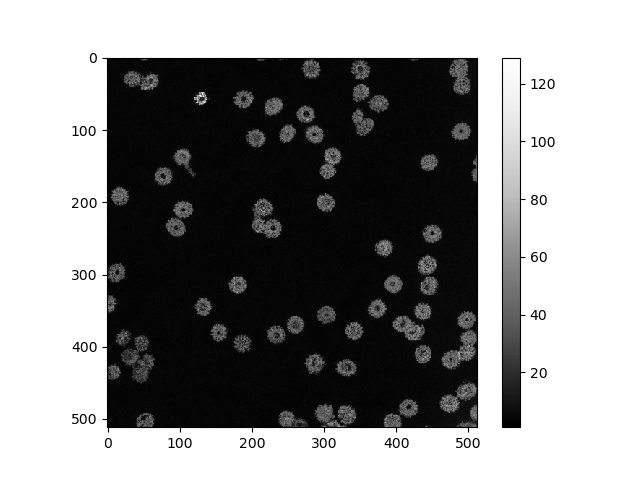
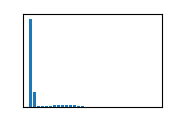

In [6]:
output_image = vary(image)

stackview.insight(output_image)

## Exercise
Load the [`human_mitosis` example from scikit-image](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.human_mitosis) and vary it.

In [5]:
from skimage.data import human_mitosis
image = human_mitosis()